<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_LiDiRus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The code cells below is to download a dataset into Colab directly.** Skip if irrelevant

In [1]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/ru/tasks/download/LiDiRus" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/LiDiRus/
  inflating: data/LiDiRus/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/LiDiRus/
  inflating: data/__MACOSX/LiDiRus/._.DS_Store  
  inflating: data/LiDiRus/LiDiRus.jsonl  
  inflating: data/__MACOSX/LiDiRus/._LiDiRus.jsonl  
  inflating: data/__MACOSX/._LiDiRus  



     0K .......... .......... .......... .......... ......    100%  155K=0.3s

In [2]:
# AX-b original English diagnostic dataset
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/AX-b.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip

Archive:  temp.zip
   creating: data/AX-b/
  inflating: data/AX-b/AX-b.jsonl    



     0K .......... .......... .......... ...                  100%  206K=0.2s

Fancy way to display content of the dataset directory

In [3]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (58.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# display the content of the folder
!tree

.
└── data
    ├── AX-b
    │   └── AX-b.jsonl
    └── LiDiRus
        └── LiDiRus.jsonl

3 directories, 2 files


### **Start playing here**

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [8]:
handler = JSONL_handler('data/LiDiRus/LiDiRus.jsonl')
df = handler.to_pandas()
handler_en = JSONL_handler('data/AX-b/AX-b.jsonl')
df_en = handler.to_pandas()

### general information on ru and eng dataset

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf?platform=hootsuite) for reference


In [5]:
import matplotlib.pyplot as plt

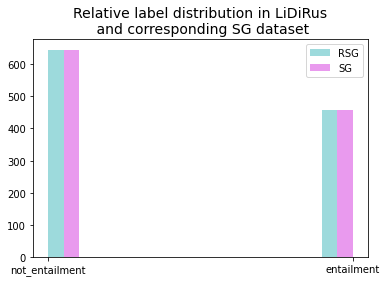

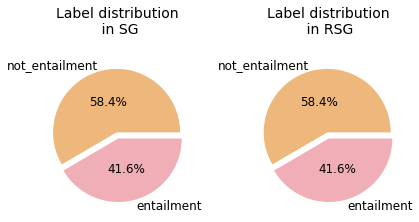

In [15]:
plt.title('Relative label distribution in LiDiRus\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

In [42]:
pd.merge(df.logic.value_counts(), df_en.logic.value_counts(), how='left', on=df_en.logic.value_counts().keys())

,key_0,logic_x,logic_y
0,Negation,54,54
1,Upward monotone,30,30
2,Intervals/Numbers,30,30
3,Temporal,28,28
4,Downward monotone,26,26
5,Double negation,26,26
6,Conjunction,24,24
7,Non-monotone,22,22
8,Conditionals,22,22
9,Disjunction,22,22


In [48]:
df.columns

Index(['idx', 'label', 'sentence1', 'sentence2', 'logic',
       'predicate-argument-structure', 'lexical-semantics', 'knowledge'],
      dtype='object')

In [53]:
df['knowledge'].value_counts()

Common sense       150
World knowledge    134
Name: knowledge, dtype: int64

In [50]:
df['predicate-argument-structure'].value_counts()

Prepositional phrases                         56
Core args                                     48
Intersectivity                                44
Anaphora/Coreference                          42
Coordination scope                            34
Active/Passive                                32
Ellipsis/Implicits                            28
Nominalization                                26
Relative clauses                              24
Datives                                       20
Genitives/Partitives                          18
Restrictivity                                 18
Coordination scope;Prepositional phrases       6
Relative clauses;Restrictivity                 4
Core args;Anaphora/Coreference                 4
Anaphora/Coreference;Prepositional phrases     4
Ellipsis/Implicits;Anaphora/Coreference        4
Nominalization;Genitives/Partitives            2
Restrictivity;Anaphora/Coreference             2
Relative clauses;Anaphora/Coreference          2
Restrictivity;Relati

In [51]:
df['lexical-semantics'].value_counts()

Lexical entailment                134
Factivity                          64
Quantifiers                        46
Named entities                     36
Symmetry/Collectivity              28
Morphological negation             26
Redundancy                         25
Lexical entailment;Quantifiers      4
Lexical entailment;Factivity        2
Factivity;Quantifiers               2
Name: lexical-semantics, dtype: int64

### There are small batches of sentences with slightly varying vocabulary

In [59]:
df.iloc[[0,1,4,5,6,7]]

,idx,label,sentence1,sentence2,logic,predicate-argument-structure,lexical-semantics,knowledge
0,0,not_entailment,Кошка сидела на коврике.,Кошка не сидела на коврике.,Negation,NaN,NaN,NaN
1,1,not_entailment,Кошка не сидела на коврике.,Кошка сидела на коврике.,Negation,NaN,NaN,NaN
4,4,not_entailment,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC-медиаплеер.","Сразу же после распаковки Ouya не поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC-медиаплеер.",Negation,NaN,NaN,NaN
5,5,not_entailment,"Сразу же после распаковки Ouya не поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC-медиаплеер.","Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC-медиаплеер.",Negation,NaN,NaN,NaN
6,6,entailment,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,NaN,Anaphora/Coreference,NaN,NaN
7,7,entailment,Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",NaN,Anaphora/Coreference,NaN,NaN


# Entailment

In [61]:
df[df.label == 'entailment'][0:10]

,idx,label,sentence1,sentence2,logic,predicate-argument-structure,lexical-semantics,knowledge
6,6,entailment,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,NaN,Anaphora/Coreference,NaN,NaN
7,7,entailment,Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",NaN,Anaphora/Coreference,NaN,NaN
18,18,entailment,"Применяя стратегию ненасильственного протеста, Ганди застал администрацию врасплох и получил уступки от властей.","Применяя стратегию протеста, Ганди застал администрацию врасплох и получил уступки от властей.",NaN,Intersectivity,NaN,NaN
22,22,entailment,Написание кода на Java не слишком отличается от программирования в наручниках.,Написание кода на Java подобно программированию в наручниках.,Double negation,NaN,Morphological negation,NaN
23,23,entailment,Написание кода на Java подобно программированию в наручниках.,Написание кода на Java не слишком отличается от программирования в наручниках.,Double negation,NaN,Morphological negation,NaN
24,24,entailment,"Рынок станет сложнее, но на нём не будет невозможно ориентироваться.","Рынок станет сложнее, но на нём будет возможно ориентироваться.",Double negation,NaN,Morphological negation,NaN
25,25,entailment,"Рынок станет сложнее, но на нём будет возможно ориентироваться.","Рынок станет сложнее, но на нём не будет невозможно ориентироваться.",Double negation,NaN,Morphological negation,NaN
26,26,entailment,"Даже после того как узнал, что это корм для животных, я не перестану когда-либо обожать Flamin' Hot Cheetos.","Даже после того как узнал, что это корм для животных, я никогда не перестану обожать Flamin' Hot Cheetos.",Double negation,NaN,Morphological negation,NaN
27,27,entailment,"Даже после того как узнал, что это корм для животных, я никогда не перестану обожать Flamin' Hot Cheetos.","Даже после того как узнал, что это корм для животных, я не перестану когда-либо обожать Flamin' Hot Cheetos.",Double negation,NaN,Morphological negation,NaN
28,28,entailment,"Он не был несогласен с позицией партии, но чувствовал, что если бы он ушел в отставку, его популярность среди индейцев перестала бы душить членство в партии.","Он согласился с позицией партии, но чувствовал, что если бы он ушел в отставку, его популярность среди индейцев перестала бы душить членство в партии.",Double negation,NaN,Morphological negation,NaN


### Vocabulary overlap

In [62]:
df.iloc[[6,7,18]]

,idx,label,sentence1,sentence2,logic,predicate-argument-structure,lexical-semantics,knowledge
6,6,entailment,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,NaN,Anaphora/Coreference,NaN,NaN
7,7,entailment,Сразу же после распаковки Ouya поддерживает Twitch.tv и XBMC медиа-плеер.,"Сразу же после распаковки Ouya поддерживает мультимедийные приложения, такие как Twitch.tv и XBMC медиа-плеер.",NaN,Anaphora/Coreference,NaN,NaN
18,18,entailment,"Применяя стратегию ненасильственного протеста, Ганди застал администрацию врасплох и получил уступки от властей.","Применяя стратегию протеста, Ганди застал администрацию врасплох и получил уступки от властей.",NaN,Intersectivity,NaN,NaN


### additional negatation word: "не", "никогда", etc.

In [65]:
df.iloc[[24,25,26,27]]

,idx,label,sentence1,sentence2,logic,predicate-argument-structure,lexical-semantics,knowledge
24,24,entailment,"Рынок станет сложнее, но на нём не будет невозможно ориентироваться.","Рынок станет сложнее, но на нём будет возможно ориентироваться.",Double negation,NaN,Morphological negation,NaN
25,25,entailment,"Рынок станет сложнее, но на нём будет возможно ориентироваться.","Рынок станет сложнее, но на нём не будет невозможно ориентироваться.",Double negation,NaN,Morphological negation,NaN
26,26,entailment,"Даже после того как узнал, что это корм для животных, я не перестану когда-либо обожать Flamin' Hot Cheetos.","Даже после того как узнал, что это корм для животных, я никогда не перестану обожать Flamin' Hot Cheetos.",Double negation,NaN,Morphological negation,NaN
27,27,entailment,"Даже после того как узнал, что это корм для животных, я никогда не перестану обожать Flamin' Hot Cheetos.","Даже после того как узнал, что это корм для животных, я не перестану когда-либо обожать Flamin' Hot Cheetos.",Double negation,NaN,Morphological negation,NaN


###  other

In [63]:
df.iloc[[22,23]]

,idx,label,sentence1,sentence2,logic,predicate-argument-structure,lexical-semantics,knowledge
22,22,entailment,Написание кода на Java не слишком отличается от программирования в наручниках.,Написание кода на Java подобно программированию в наручниках.,Double negation,NaN,Morphological negation,NaN
23,23,entailment,Написание кода на Java подобно программированию в наручниках.,Написание кода на Java не слишком отличается от программирования в наручниках.,Double negation,NaN,Morphological negation,NaN


In [ ]:
df[(df.label == 'not_entailment') & 
   (df.logic == 'Double negation')][['label', 'logic',
                                     'sentence1', 'sentence2']].sample(frac=1)

,label,logic,sentence1,sentence2
1065,not_entailment,Double negation,"Я скажу, что она украла мои деньги.","Я не скажу, что она не крала мои деньги."
543,not_entailment,Double negation,"Корпорация Microsoft считает иск обоснованным, потому что обнаружена единая причина для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола."
1064,not_entailment,Double negation,"Я не скажу, что она не крала мои деньги.","Я скажу, что она украла мои деньги."
542,not_entailment,Double negation,"Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск обоснованным, потому что обнаружена единая причина для жалоб работников и истцы не выявили системной дискриминации по признаку пола."


In [ ]:
df.iloc[542:546][['label', 'logic', 'sentence1', 'sentence2']]

,label,logic,sentence1,sentence2
542,not_entailment,Double negation,"Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск обоснованным, потому что обнаружена единая причина для жалоб работников и истцы не выявили системной дискриминации по признаку пола."
543,not_entailment,Double negation,"Корпорация Microsoft считает иск обоснованным, потому что обнаружена единая причина для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола."
544,not_entailment,Negation,"Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск обоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола."
545,not_entailment,Negation,"Корпорация Microsoft считает иск обоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола.","Корпорация Microsoft считает иск необоснованным, потому что нет единой причиной для жалоб работников и истцы не выявили системной дискриминации по признаку пола."
